In [1]:
import schemdraw
from schemdraw import flow

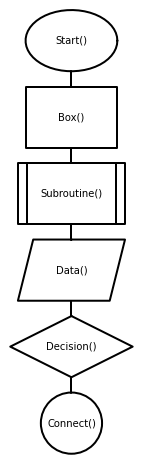

In [2]:
d = schemdraw.Drawing(fontsize=10, unit=.5)
d.add(flow.Start(label='Start()'))
d.add(flow.Line())
d.add(flow.Box(label='Box()'))
d.add(flow.Line())
d.add(flow.Subroutine(label='Subroutine()'))
d.add(flow.Line())
d.add(flow.Data(label='Data()'))
d.add(flow.Line())
d.add(flow.Decision(label='Decision()'))
d.add(flow.LINE)
d.add(flow.Connect(r=1, label='Connect()'))
d.draw()

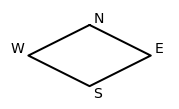

In [3]:
d.add(flow.Decision(N='N', S='S', E='E', W='W'))